# Tarea 9

## Entrega: miércoles, 28 de octubre de 2015

[Debido a un error en el planteamiento de la tarea 8, de la tarea 8 sólo se tomará en cuenta la pregunta 1. Aquí se replantea la pregunta 2 de la tarea 8.]

Una ecuación ligeramente distinta en apariencia, pero radicalmente distinta en comportamiento, de la ecuación de difusión es la siguiente ecuación de **reacción-difusión**; el primer término se puede considerar como modelando una reacción química local, o el crecimiento local de una población de animales:

$$
\frac{\partial u}{\partial t} = u(1-u) + \nabla^2 u. 
$$

[1] Considera la ecuación de reacción-difusión en 1D. 

(i) Considera estados **espacialmente uniformes** de la ecuación, es decir, que no dependan del espacio, tal que la derivada espacial desaparece. Encuentra las soluciones estacionarias de la EDO correspondiente. ¿Cuál es estable y cuál es inestable? Es decir, si comienzo cerca de cada uno, ¿me quedo cerca?, o ¿me alejo?

**Solución:**

Como desaparece la derivada espacial, la ecuación de reacción-difusión se vuelve

$$
\frac{\partial u}{\partial t} = u (1-u). 
$$

Es fácil ver que si $u_0 = 0$ en algún punto, entonces $\frac{\partial u}{\partial t} = 0$. Esto también pasa para $u_0 = 1$. La estable es $u_0 = 1$. En efecto, si perturbamos la solución, i.e. $u' = 1+\epsilon$, entonces $\frac{\partial u}{\partial t} = -\epsilon(1+\epsilon)$, i.e. para $\epsilon > 0$, $\frac{\partial \epsilon}{\partial t} < 0$ y vice versa, que es suficiente para la estabilidad. De otro lado, para $u_0=0$, la situación es contraria, ya que para si $u$ es ligeramente mayor a 0, entonces $\frac{\partial \epsilon}{\partial t} > 0$ y vice versa, lo cual implica un equilibrio inestable

(ii) Utiliza las condiciones de frontera particulares de Dirichlet siguientes: $u(0) = a$ y $u(L) = b$, donde $a$ y $b$ son los valores estacionarios de la ecuación que encontraste en la pregunta (i). Como condición inicial, utiliza todos ceros excepto en las fronteras. Simula la evolución del sistema por bastante tiempo. Puedes utilizar Euler (o sea, la discretización más sencilla en el tiempo). No guardes todos los pasos intermedios para que no se trabe tu computadora.

**Solución:**

Usamos el FTCS para obtener:

$$
\frac{u^{t+1}_x - u_x^t}{k} = u_x^t (1 - u_x^t) + \frac{u_{x+1}^t - 2u_x^t + u^t_{x-1}}{h^2}
$$

De donde obtenemos la ecuación de evolución:

$$
u_x^{t+1} = u_x^t + ku_x^t (1 - u_x^t) + \frac{k(u_{x+1}^t - 2u_x^t + u^t_{x-1})}{h^2}
$$

La estabilidad de la solución requiere que $\frac{k}{h^2} \leq \frac12$. Si usamos una malla uniforme con longitud espacial $L$ y temporal $T$, entonces esta condición se traduce a

$$
N_T \geq 2T \frac{N_L^2}{L^2} \: ,
$$
donde $N_L$ y $N_T$ son los números de divisiones de sus escalas respectivas. En código:

In [ ]:
L = 1 # Longitud espacial
T = 1 # Longitud temporal

N_L = Int(100) # Número de divisiones longitudinales
N_T = Int(max(N_L, ceil(3*T*N_L^2/(L^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T/N_T
h = L/N_L

mesh = Array{Float64}(N_T, N_L) # Creamos la malla
fill!(mesh, 0) # Y la llenamos de ceros

# Ahora especificamos las condiciones iniciales
mesh[1,1] = 0
mesh[1, N_L] = 1

for t in 1:(N_T-1)
    mesh[t+1,1] = mesh[1,1]
    mesh[t+1, N_L] = mesh[1,N_L]
    
    for x in 2:(N_L-1)
        mesh[t+1,x] = mesh[t,x] + k*mesh[t,x]*(1-mesh[t,x]) + (k*(mesh[t, x+1] - 2*mesh[t,x] + mesh[t,x-1]))/(h^2)
    end
end

(iii) Dibuja sólo unas cuantas gráficas que ilustren la evolución (e.g. 10 figuras). [Recuerda que puedes generar una nueva figura con `figure()`. Puedes utilizar el operador de módulo `%` para seleccionar sólo ciertos pasos de tiempo, e.g. `if i % 100 == 0`.] Ponlas también en una animación si puedes. ¿Qué observas? Descríbelo con la máxima precisión que puedas.

In [ ]:
using PyPlot;

# Graficamos algunas gráficas
for t in [[ceil(n*N_T/100) for n in 1:40]; N_T]
    plot(linspace(0, L, N_L), transpose(mesh[ceil(t),:]), "-");
end
xlabel("X")
ylabel("u")
title("Evolución de la ecuación de reacción-difusión (cond. fijas)")

**Discusión:**

Se observa que la distribución inicial ($0$ en la izquierda y $1$ en la derecha) se suaviza y se empieza a propagar hacia la izquierda. Finalmente, tiende a una linea recta de $(0,0)$ a $(1,1)$

(iv) Ahora utiliza condiciones periódicas, con una condición inicial localizada y chica, es decir, como una delta, pero de magnitud chica, digamos 0.1. ¿Qué observas? ¿Cómo se relaciona con la pregunta (i)?

**Solución:**

Modificamos ligeramente el código:

In [ ]:
L2 = 7 # Longitud espacial
T2 = 1 # Longitud temporal

N_L2 = Int(140) # Número de divisiones longitudinales
N_T2 = Int(max(N_L2, ceil(3*T2*N_L2^2/(L2^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T2/N_T2
h = L2/N_L2

mesh2 = Array{Float64}(N_T2, N_L2) # Creamos la malla
fill!(mesh2, 0) # Y la llenamos de ceros

# Ahora especificamos las condiciones iniciales (como una delta de Dirac) desplazadas hacia la derecha (por curiosidad)
for x in floor(6*N_L2/8):floor(6*N_L2/8)+1
    mesh2[1, x] = 0.1
end

for t in 1:(N_T2-1)
    mesh2[t+1,1] = mesh2[t,1] + k*mesh2[t,1]*(1-mesh2[t,1]) + (k*(mesh2[t, 2] - 2*mesh2[t,1] + mesh2[t,N_L2-1]))/(h^2)
    mesh2[t+1,N_L2] = mesh2[t,N_L2] + k*mesh2[t,N_L2]*(1-mesh2[t,N_L2]) + (k*(mesh2[t, 2] - 2*mesh2[t,N_L2] + mesh2[t,N_L2-1]))/(h^2)
    
    for x in 2:(N_L2-1)
        mesh2[t+1,x] = mesh2[t,x] + k*mesh2[t,x]*(1 - mesh2[t,x]) + k*(mesh2[t, x+1] - 2*mesh2[t,x] + mesh2[t,x-1])/(h^2)
    end
end

In [ ]:
using PyPlot;

# Graficamos algunas gráficas
for t in [1; [ceil(n*N_T2/100) for n in 1:10]]
    plot(linspace(0, L2, N_L2), transpose(mesh2[ceil(t),:]), "-");
end
xlabel("X")
ylabel("u")
title("Evolución de la ecuación de reacción-difusión (cond. periódicas)")

**Discusión:**

Observamos que lo primero que pasa es que la "delta" se esparce homogéneamente sobre todo el espacio.

(v) Debes haber visto algún tipo de esparcimiento en el espacio. Para calcular qué tan rápido se esparce, calcula en el tiempo el número de sitios del sistema cuyo valor $u_i$ excede un cierto umbral, e.g. $0.9a$. Dibuja una gráfica de esta cantidad en función del tiempo para calcular un tipo de velocidad. Compara esto con la tasa de esparcimiento de difusión que conoces (por ejemplo, por el desplazamiento cuadrático medio).

(vi) ¿Qué concluyes acerca del comportamiento físico de este sistema? Interprétalo en el contexto de las reacciones o de los animales, y contrástalo con la difusión pura.

[2] (i) Simula la ecuación en 2D con condiciones periódicas y una condición inicial que es una delta chiquita de nuevo. ¿Observas el mismo comportamiento físico?

In [11]:
### La generalización a 2D es sencilla, así que la hacemos en código de una vez:

Lx = 1 # Longitud espacial x
Ly = 1 # Longitud espacial y
T3 = 1 # Longitud temporal

N_L3 = 30 # Número de divisiones longitudinales
N_T3 = Int(max(N_L3, ceil(3*T3*N_L3^2/(Lx^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T3/N_T3
h = Lx/N_L3

mesh3 = zeros(N_T3, N_L3, N_L3)

# Ahora especificamos las condiciones iniciales (como una delta de Dirac en el centro)
mesh3[1,Int(floor(N_L3/2)),Int(floor(N_L3/2))] = 0.1

for t in 1:(N_T3-1)
    for x in 1:N_L3
        for y in 1:N_L3
            # Calculamos los indices de los puntos
            xp = x-1
            xn = x+1
            
            yp = y-1
            yn = y+1
            
            # En caso de que los puntos sean de frontera, hay que meter las condiciones de frontera
            if (x == 1)
                xp = N_L3-1
            elseif (x == N_L3)
                xn = 2
            end
            
            if (y == 1)
                yp = N_L3-1
            elseif (y == N_L3)
                yn = 2
            end
            
            mesh3[t+1, x, y] = mesh3[t,x,y] + k*mesh3[t,x,y]*(1-mesh3[t,x,y]) + (k*(mesh3[t, xn, y] - 2*mesh3[t,x, y] + mesh3[t,xp, y]))/(h^2) + (k*(mesh3[t, x, yn] - 2*mesh3[t, x, y] + mesh3[t,x, yp]))/(h^2)
        end
    end
end

**Discusión:**

El comportamiento parece ser oscilatorio, i.e. se propagan ondas desde el lugar de origen. El esparcimiento, sin embargo, se parece al caso 1D. Al final, toda la función decae.

In [12]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim  

function anima(edos, nombre::ASCIIString)
    fig = figure(figsize=(5,5))
    cuadros = [[imshow(edos[i], cmap="Blues", interpolation="none")] for i=1:length(edos)]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=400, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQABBYltZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAv3ZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMADGj5q+cbg4CsoYAABIgAL06cjGyKQqFwAHLQphDOevosvhRhJthBX0Nxo6wutAZmOegAFCI9DITZ3m5phXEj5Z2mL/ugpTUTHovFoshf0Okxey93m2hnBCjOUf0Orp2ebCtGhS2xEdelVIggDsbNL+xuv5+5rDTIPRur67ZeW8aqljdRx3OGmwiA4Pxg7axSHtwNmaMx94I/8ZVgq+3U/2tOJdwqt9JokRkm8OnBXwFxF5/C15RmnN236qW6RP+P9I2WpbNwbQA7I/m005dkKhXUkM4wTQt3KstAljvzMNiV+nQkT0htxMUErrKBgKHR0C2RhRirRX/IVzCYsBOnsiBLRLl3sqQzc3rG+cOAPoMTUOVqQz2ZcM5UNMGoGMWjFJducApg2JHlXyDTVjudriKFBLwr305qBKHNiHYSDnwwD/CE7JLVy1sZM1kFvwEGGCrTNVQQX0CgqOftOC2wWSTkEXcrKaZsdlW8k4frEyqUrrS7VGP+PO6IITDRYxEQH50Aq/9atPmf0ZIqAVniOkL2OhQJfHXrF7AYWH55yN3A5j/1U8o41c0qRhsdKTjQ3gSp3Xy//WBCfYo2bZHg4gOAh7w8ZUjkJw6ENxFcO4mdhDlci/M6sGp+gBAl82WjH8fnc1ibOGPZf9TWsXl4kt+wC3LqAiZURpL96lZhSfP/unVbzvY0fgyw9HzqjdXO7V+etN65C7Lps4fhqh8kRvQE/Z7fKWWO2aFZ8SVJKSw8p/of7xTOskGY5E9NW582h137cen+Kx4AjjlxGeojE24XbnfrNCN4Ra0AsKEh07WwvOtqL6HbOqCZ73nEEqAKANQyJ7XRnfoqBxvPSijn1SNbJaUdLRFi729HxezV/jX6mBcs62r+8IRG54wQwrWoHWEQ4E8uOa+yGJ4Ol32nKC5iN/5/gu99j8wjUWz2xGC/vaa5kJsfLSckeNKQMdAthaazoB9DlLGefvTaNhDAGPxO6Ht7hoKjd0cqQZT9jZuYdSuG1zjNTXS/5G+Nu0l3VP/3WrejNrESV/wqkzdbe8nRowRvlmFQnC5gkCp3oU9u2t6EqjrupLIHdaa0PD+pV9GycUT10Qsq7MGHJ4ivKRUEw+YkLsukGqWy7E1Qm8Fa2TV10DWNzycvfJ3c2Gyyy17T+0Zln1F25G//a9hE7YQ/U03s5jwKALzkpKqh7zil7m1keZjMzi8AIFQvqf8URMMEkGbElqmifze9DqQHv+As7Ijh+DCfOMxAq5H6aLz3/kZpUcKYIpM0kN9bhNqIa+LVtX5bP2qT6M5nQzm2hoUkpAurDAC5VsD8pVEJEZ6++6z5W7QCxjznGziNyPj0Uxwh+7TM70punvX+q+rspNHi6LE1C+emh6g8mMibjpdIabuf//4Qy50XBivx//b0KcKo3u8KPZl/gXrmsO2fTstlHmHiQwbhelG9eiehCNd6J9VSnID1RHHpqYqjimX5/JN5s8+seMa150sUexHKe6AY1xVyW9zdxeMgengQ75i3SJUC6DWBcIgKzdnobi9ZlH3oVT8ZzZDlN/rX7u06MLSxAbmHUIVFkLyDz03J2teoW9NCNR9xK2CoGBOaPd2CmnciPFc9Wsy5aixMK+YLvdxhSwY/FxnzXojCedHs92jQ9CNCbD1W8SQn1r7Dm25JEptJNGMr3H2qUS75cJYcVbtIdi+FASLlTQm9C2av5bJPxghttc5f9ZhUGvwL/logYrob4kPl1/aov1/HOU9uXzYrhgbXxH9G9tXmSzwh5GabQBHfIDTp/KGBcTLFxwBWB1pGj4QxCcc4R2dplT2OsUlA0Y44LNRygH1qneLSUyrN1YvRhkJPkMxSZzmAfr0WCnNdc5ZI+2uvuUFaw5wH21HAmgDpUVPiutRy2eWVLkpaoYm/fxDN0QirQp9mZpo0FXb1vCAGIE795z/n90i95LmJfq6xuXlloYAIFY+buBSsBF9pdGZ0mER3Q5hVJyWV8uihY8vyQk4twEEBUwWPrPVI2OEos/tSS0N9KtIsb6w7j13v5cHZRRw7jRDT+4T+Zvfe0Nc/bL/ULpcmEWau/OB5HO+eGAs8joXqvosPe0HgLUst5lXP4XCP+YOg2awaulMZu0SuIZmgPO+cXrBfABR7BU6/buiu3Z6lDzvws51t0JTCrL0VE8KzH3UAFQqDbeyBk1z2Fu4pcvFjt9hXbeX2510b8PTQUlPLvsZkEXWjeLNSf3bvLPsZld9VlTff+V4g2cv1yUIFAsR1rARRxNQrupbZcxVKoSl5xl64dqpVQEQm1fG/1u9cRVac66SyleFIr7LdqNCkpmS6OLneTnJFJFxd/z/RVhwG82Z7U91nhH6dRF9PM+Z97/ZvNYHXrW4GYvGklXsYYfWUHuVd6RfxgBuc3/2vl0C9YBqFvVeUKM1ZWtWF96KHO1FH/8fc/45Azxlc2aemxgCpq332Byh97sQRHjm3IsXolCpOP2Bcydu9ZOx3Y0ijxG9SX+/TLbsdpnhOgRlARChLxr44aqb33IXgGYQFezRHCvsPHhDKZYkJ5DSib6/AT9/vIulSseKGIykYcRU7H26wyOz1VCZLps7dO2hpvt2csmWEGBW8ICOwSHWd3mIJtE6VA+/4Uucl64GP/McGm5K6yIcnm6/rtGpa8sRwilDMREXIbBG8cTZ+rIlVTdXG5Eh052Tl8vSy9WHYdSDgGNAVU8OCZUfAOrUA21E6eK2IofSN/jZK0Ze+DzIYk9BcmIVMIgTkEAjp92jwMb3SRG7jz2rWcGQ61LVeCLEUhdts8IDoDnFUqD+yZ1YNTyA6LD0G6zYT7elQ3V2uRZEeHF3wlv2AW5dQCsbFbgdt+XkODKSuZ3R2cAkg0+kwBk3l8epbX0NOxaT9HDVhEnc9qhzeGfTKxwpYPgCdTZQJ5JxRerIge46

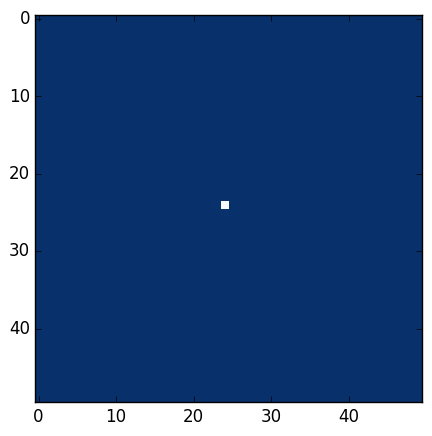

In [13]:
edos=Any[]

for k in 1:41
    push!(edos,squeeze(mesh3[k,:,:],1))
end

anima(edos, "2d_r-d")
muestra_animacion("2d_r-d")

(ii) Utiliza una condición inicial que es 1 en un cuadrado chico. ¿Qué observas?

In [14]:
### La generalización a 2D es sencilla, así que la hacemos en código de una vez:

Lx = 1 # Longitud espacial x
Ly = 1 # Longitud espacial y
T3 = 1 # Longitud temporal

N_L3 = 30 # Número de divisiones longitudinales
N_T3 = Int(max(N_L3, ceil(3*T3*N_L3^2/(Lx^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T3/N_T3
h = Lx/N_L3

mesh3 = zeros(N_T3, N_L3, N_L3)

# Ahora especificamos las condiciones iniciales (como un cuadrado chico en el centro)
for x in -3:3, y in -3:3
    mesh3[1,Int(floor(N_L3/2))+x,Int(floor(N_L3/2))+y] = 0.1
end

for t in 1:(N_T3-1)
    for x in 1:N_L3
        for y in 1:N_L3
            # Calculamos los indices de los puntos
            xp = x-1
            xn = x+1
            
            yp = y-1
            yn = y+1
            
            # En caso de que los puntos sean de frontera, hay que meter las condiciones de frontera
            if (x == 1)
                xp = N_L3-1
            elseif (x == N_L3)
                xn = 2
            end
            
            if (y == 1)
                yp = N_L3-1
            elseif (y == N_L3)
                yn = 2
            end
            
            mesh3[t+1, x, y] = mesh3[t,x,y] + k*mesh3[t,x,y]*(1-mesh3[t,x,y]) + (k*(mesh3[t, xn, y] - 2*mesh3[t,x, y] + mesh3[t,xp, y]))/(h^2) + (k*(mesh3[t, x, yn] - 2*mesh3[t, x, y] + mesh3[t,x, yp]))/(h^2)
        end
    end
end

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAC+2ttZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA4nZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMADGj5q+cbg4CsoYAABIgAL06ch+x74HMAnSdiH9qFvu/FAqEcqtxICjKoJxN7/mnLr3BvdLAzPcVor6cJCDSbjLsNAV+zV4DXS+UWYFHCe+XcgHtLirZTetvL+Sxuy4JfxuccgsgDW4xbVLQjugyYhrsBdWvZ6wlX1OYze5XD3b891OTOgU5LIrb/TBMudb6/4lBqxqfF5BlEUNzQBUvIwdX/nnNq+EaG905EptFkCCe3Pk9F1VA2E3x9Am2YP/iZ39DUCJEqZ95m7NZgluXbcTCgm+Dc6fyfzmrGo42rS6w+stIJZVTVe+43fANVc/ycr8wa+DUxb/ZmX5zZ0uZUZDNhV1AzNUWDHV7/PmRAlol4t1NMYY3j0Px6CTXWCKvRyBVRJAnDy3u4mXvTmazMzKWJbBvawaC8jqLjsF9YnUcAPH8I6pwSTrZdl1c4SWS6jQhUuoR2isIyQvDwNoWXoSB3yhc4xLGqjL/R+P7DexOP67dTvXzm0YV2nnrf5PCBac/vecRkS63OcZ7Qstc99gtLXSrIan53fVMFycQ6Jk9j9v3PywXdcu8K+w9cprWAIwNPc7sP4mA5xUMWC7uu93nDlYOffC/51PXvvKfllD5JfQ+ycm9AZMxo0ReWzX9oMc7ATM/65e0HMrnXq8LUoug35RUMhEeMoowNyZvrVpsIXMb7nsVt8A3Dc/8ORAAby63bub2Q/8EYXl9IRjmwHhTRx1OWQo3FPXS8mEmzo8jmOLGsyGWcjdBwpMbOLJAjLUHhu0RpgkSTNtUuHDqNv1hTokMHbSz6uXnMk9R/XmiUChz1x8ZwAkg6uFvxuS6msZlGxvhi1wBNMHhwvtgvBWQWDIsbgZ4n5b+95CFSL2Xl8nrNR/hEhfTgdMb9oQHtPvb1IfMOUBFu7ZTXG986QRGk4VGs6fLy3U0W+wYBL2sCpncDjZRpdSPO66l+DMGPzM7xTGkjL5sr9D7OD6sK5/B/j52ocpqCEOVEKaNjFrDrFV1TztqdPBT+Y9r00B2Xf2H1dhtLctgh631u9kqdbWBUblxb3t4Giv31p2WfIuXlCNLZqRJBKjGJo/qhYOaPmaPknKfvbPsrOSpL/Bl123WsuBqU0mBNCo/ikwDhVIwVwCWFBTs6uTSnRRuc/ygo68wpmvtTbDxls8t3IcINpRrVwL18uODRpXNz6g0DU+Q0qL3RD/eFa6yMxX98mvnbSmMPMYuTHCyd4b0SxnVSBFrYj9u4eFiKC7zy2RQ5E91ncoeyA5V8mtbOwsl6gqpm05Kuz07EzHHcDv8wJofqKcmwGGIDSXh0O11X34mMuOR/Ge3fEVzpVs+WGQVRuhBT44ifjvD+/h/5+C73pCvknBPtahichp0LdbRwPNiedwPzkFIO//AJvyY+pebf3KcRstPTKAd9LF9XtofOoEoGEU3OpD9CFGLcCJR8pX9CPITIamll2QuOPnwiMlXWXD2Ekpqjoz3QZyyucVr5zVrMcvPFWmVz/if5CJKvWlYt3iaRtbWe1ZLpehQUPJjzE/mCI6uzVoOXoVVQP+AyIv7Vz7/04g1yPL9/eZSGHJYWyGOa9O59NWsTr/gVtyvYT4KeMUppNqt8nxOSfYAWV3j+sTuRiTYPihelM6974b3iY4kfeVvKw1hmvBuew9sGXlfPKI9UjQzWglH/FrnnYnT+E3A2rEDzB8WMIkKCz8ie6oaaT9B1h6JgrvNngmQnacEYMDGLUdHPfwtfzeQXoFKGtiFTgz8Bp1jkEShNmA2NgYtm1lk4RvbyiL1rD+yJZBRaIWyVUlYBpB6FC4Wj4d9x1Y8FJIWF9Ap8ogbPXM3WfmhjSnacBQGHEcZqFjYESFusmg/KlHdPSMDRY45I6ggLqRV0+kD/q6shMn9HYhmnr38TYK/KaebMQf5llBr98S5wPNoxC89lHM9kq7GbGG7RqVmK3n/qvzjsyjnQjoF7bB/dgdV7X6KjKD6z8lIDseLjvsgi2MN6Nkks53WsZ+wJ5GI+9+EgyDaSCHJBoSaoKEk3ZtGXMoqX8/Zbo7ELLSOoBP+UrFoo8/JoASmx0v9BYvHcCoi7y357HAAiNcwXK21lJC1tpzdsrsl0Z/bPygBqvOufA4y7o74Ewwp/r37DQhe9vrAx0NXurEGn2gUB/5l4LxZOXpO6vwHPqLKZn+Ct/RyNTlTKDpwph+eF23VrEq7rGUA0JbSfrIEQ4ANsEPiE9CLYwwAcz12NSxJiEm6Ms0B6/f+pvWScQhNvZoeQC9e0rEzWW+EoKjrp7Wbd4uOB+IRBKVrFOS9w//EoUgjvm8JvExYLSyr8EY/l4xQIm4jws1K9Lu3gBiuAO4YkGtku+aXaQmb0gSu+SD73BC30GwmD07pHROaOoJa5tjorxsfhxAd3UExEVldU0IjFzwM2eklXwkhmAaqelkbwPNvyP5x4bwSDC2/lFefvKVveIIe0qOvu5h64ZITU/nmRPy+bSiQtiw6FQQDkw+voCUeEYwr+uyEDq3pA0yCFNIe56+bas82+4GHX2vXyyX6U3L6PeHHJOoYDonkB8Mg6n5xUdy1mQaE4sILiqGhts3btYdnFTXnZcyyjyo7hx3OGk0zaOdaxDSRWTebqu87zRBkuJWW/q/TKgUbWQJw//h+WAO9gh1qBIC/ATB6cYsD4BqQ0Q7t+XyK0KlNauhjS4Dtp70AbZwE07NB/Byfno22LAVVeDBB7yVbQcjGemM2naLQ7RykLB0iziztI12zPCDRBLowqNyf15ADPDnntm65MJv1VR56sy0O9tFSeyyWv3qb3NOaIain6jv1YuQ6XpexfzUnOUufpM/7GBULY9NkM/xwg29Okj1NGiKLhhXFKb/1qdzapqEvbSsPmnYr7SgyFiJBDrLozhjyZXG/90HwPmQlpfZ4SUsXrBgIrwrMdTBm

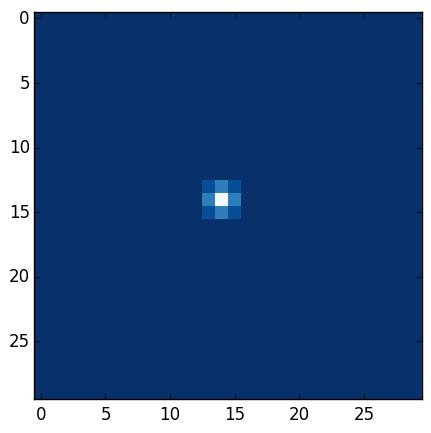

In [15]:
edos=Any[]

for k in 1:41
    push!(edos,squeeze(mesh3[k,:,:],1))
end

anima(edos, "2d_r-d2")
muestra_animacion("2d_r-d2")

** Discusión:**

El caso del cuadrado es parecido al de la delta de Dirac, pero al inicio, como era de esperarse, aparece un anisotropía durante el esparcimiento.

(iii) ¿Qué conclusión general sacas acerca del comportamiento físico de esta ecuación y lo que modela?

**Discusión:**

El comportamiento se parece bastante al comportamiento de la ecuación de difusión, aunque hay oscilaciones extrañas en el caso 2D. Además, existe un decaimiento a tiempos largos.